In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


In [3]:
diabetes.shape[0]

778

In [4]:
diabetes['Outcome'].value_counts()

0    510
1    268
Name: Outcome, dtype: int64

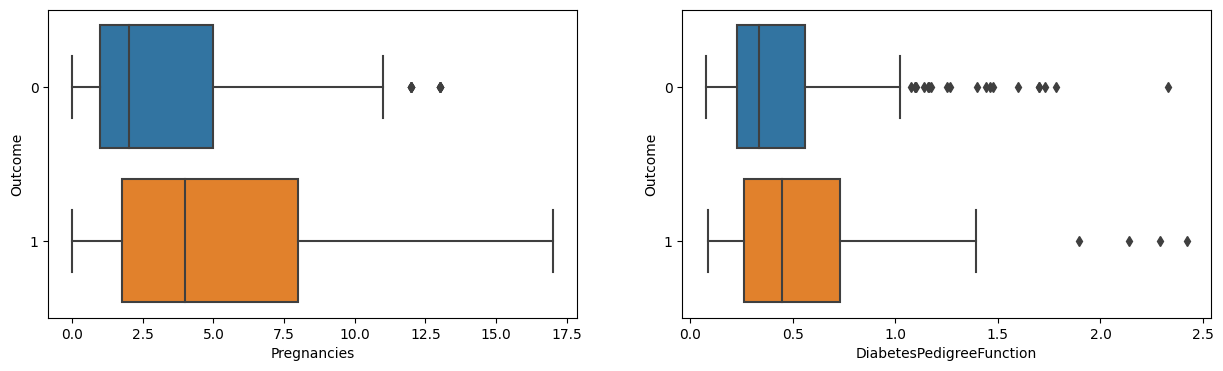

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
boxplot = sns.boxplot(data=diabetes, y='Outcome', x='Pregnancies', orient='h', ax=axes[0])
boxplot2 = sns.boxplot(data=diabetes, y='Outcome', x='DiabetesPedigreeFunction', orient='h', ax=axes[1])

In [6]:
diabetes = diabetes.drop_duplicates()

In [7]:
diabetes.shape[0]

768

In [8]:
low_information_cols = [] 

#цикл по всем столбцам
for col in diabetes.columns:
    #наибольшая относительная частота в признаке
    top_freq = diabetes[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = diabetes[col].nunique() / diabetes[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

Gender: 100.0% одинаковых значений


In [9]:
diabetes = diabetes.drop('Gender', axis=1)

In [31]:
diabetes.shape

(768, 9)

In [11]:
diabetes['Glucose'] = diabetes['Glucose'].apply(lambda x: np.nan if x==0 else x)
diabetes['BMI'] = diabetes['BMI'].apply(lambda x: np.nan if x==0 else x)
diabetes['Insulin'] = diabetes['Insulin'].apply(lambda x: np.nan if x==0 else x)
diabetes['SkinThickness'] = diabetes['SkinThickness'].apply(lambda x: np.nan if x==0 else x)
diabetes['BloodPressure'] = diabetes['BloodPressure'].apply(lambda x: np.nan if x==0 else x)

display(diabetes)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,190.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,NaN,35.7,0.148,21,0
2,2,108.0,64.0,NaN,NaN,30.8,0.158,21,0
3,8,107.0,80.0,NaN,NaN,24.6,0.856,34,0
4,7,136.0,90.0,NaN,NaN,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
763,5,139.0,64.0,35.0,140.0,28.6,0.411,26,0
764,1,96.0,122.0,NaN,NaN,22.4,0.207,27,0
765,10,101.0,86.0,37.0,NaN,45.6,1.136,38,1
766,0,141.0,NaN,NaN,NaN,42.4,0.205,29,1


In [29]:
round(diabetes['Insulin'].isnull().mean(), 2)

0.49

In [34]:
thresh = diabetes.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
diabetes = diabetes.dropna(thresh=thresh, axis=1)
display(diabetes)


,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,NaN,30.8,0.158,21,0
3,8,107.0,80.0,NaN,24.6,0.856,34,0
4,7,136.0,90.0,NaN,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...
763,5,139.0,64.0,35.0,28.6,0.411,26,0
764,1,96.0,122.0,NaN,22.4,0.207,27,0
765,10,101.0,86.0,37.0,45.6,1.136,38,1
766,0,141.0,NaN,NaN,42.4,0.205,29,1


In [36]:
diabetes = diabetes.dropna(thresh=6, axis=0)
diabetes.shape[0]

761

In [42]:
values={
    'Glucose':diabetes['Glucose'].median(),
    'BloodPressure':diabetes['BloodPressure'].median(),
    'SkinThickness':diabetes['SkinThickness'].median(),
    'BMI':diabetes['BMI'].median(),
}
diabetes = diabetes.fillna(values)
round(diabetes['SkinThickness'].mean(),1)

29.1

In [43]:
def outliers_iqr_mod(data, feature, l=1.5, r=1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * l)
    upper_bound = quartile_3 + (iqr * r)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [44]:
outliers, cleaned = outliers_iqr_mod(diabetes, 'SkinThickness')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')

Число выбросов по методу Тьюки: 87


In [45]:
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [47]:
outliers, cleaned = outliers_iqr_mod(diabetes, 'DiabetesPedigreeFunction')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')

Число выбросов по методу Тьюки: 29


In [50]:
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [51]:
outliers, cleaned = outliers_z_score_mod(diabetes, 'DiabetesPedigreeFunction', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')

Число выбросов по методу z-отклонения: 0
